In [1]:
from preamble import *
%matplotlib inline

## Introduction
### Why Machine Learning?
#### Problems Machine Learning Can Solve

#### Knowing Your Task and Knowing Your Data

### Why Python?

### scikit-learn
#### Installing scikit-learn

### Essential Libraries and Tools

#### Jupyter Notebook

#### NumPy

In [2]:
import numpy as np

x = np.array([[1, 2, 3], [4, 5, 6]])
print("x:\n{}".format(x))

x:
[[1 2 3]
 [4 5 6]]


#### SciPy

In [3]:
from scipy import sparse

# Create a 2D NumPy array with a diagonal of ones, and zeros everywhere else
eye = np.eye(4)
print("NumPy array:\n", eye)

NumPy array:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [4]:
# Convert the NumPy array to a SciPy sparse matrix in CSR format
# Only the nonzero entries are stored
sparse_matrix = sparse.csr_matrix(eye)
print("\nSciPy sparse CSR matrix:\n", sparse_matrix)


SciPy sparse CSR matrix:
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [5]:
data = np.ones(4)
row_indices = np.arange(4)
col_indices = np.arange(4)
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
print("COO representation:\n", eye_coo)

COO representation:
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


#### matplotlib

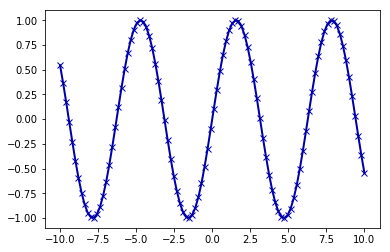

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

# Generate a sequence of numbers from -10 to 10 with 100 steps in between
x = np.linspace(-10, 10, 100)
# Create a second array using sine
y = np.sin(x)
# The plot function makes a line chart of one array against another
plt.plot(x, y, marker="x")

#### pandas

In [7]:
import pandas as pd

# create a simple dataset of people
data = {'Name': ["John", "Anna", "Peter", "Linda"],
        'Location' : ["New York", "Paris", "Berlin", "London"],
        'Age' : [24, 13, 53, 33]
       }

data_pandas = pd.DataFrame(data)
# IPython.display allows "pretty printing" of dataframes
# in the Jupyter notebook
display(data_pandas)

Age  Location   Name
0   24  New York   John
1   13     Paris   Anna
2   53    Berlin  Peter
3   33    London  Linda

In [8]:
# Select all rows that have an age column greater than 30
display(data_pandas[data_pandas.Age > 30])

Age Location   Name
2   53   Berlin  Peter
3   33   London  Linda

#### mglearn

### Python 2 versus Python 3

### Versions Used in this Book

In [9]:
import sys
print("Python version:", sys.version)

import pandas as pd
print("pandas version:", pd.__version__)

import matplotlib
print("matplotlib version:", matplotlib.__version__)

import numpy as np
print("NumPy version:", np.__version__)

import scipy as sp
print("SciPy version:", sp.__version__)

import IPython
print("IPython version:", IPython.__version__)

import sklearn
print("scikit-learn version:", sklearn.__version__)

Python version: 3.5.6 |Anaconda, Inc.| (default, Jun  4 2021, 13:57:47) 
[GCC 7.5.0]
pandas version: 0.25.3
matplotlib version: 3.0.3
NumPy version: 1.18.5
SciPy version: 1.1.0
IPython version: 5.8.0
scikit-learn version: 0.18


### A First Application: Classifying Iris Species
![sepal_petal](images/iris_petal_sepal.png)
#### Meet the Data

In [10]:
# We can load it by calling the load_iris function:

from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [11]:
# The iris object that is returned by load_iris is a Bunch object, which is very similar
# to a dictionary. It contains keys and values:

iris_dataset

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [12]:
print("Keys of iris_dataset:\n", iris_dataset.keys())

Keys of iris_dataset:
 dict_keys(['target_names', 'DESCR', 'target', 'data', 'feature_names'])


In [13]:
# The value of the key DESCR is a short description of the dataset. We show the 
# beginning of the description here

print(iris_dataset['DESCR'][:193] + "\n...")

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive att
...


In [14]:
# The value of the key target_names is an array of strings, containing the species of
# flower that we want to predict:

print("Target names:", iris_dataset['target_names'])

Target names: ['setosa' 'versicolor' 'virginica']


In [15]:
# The value of feature_names is a list of strings, giving the description of each feature:

print("Feature names:\n", iris_dataset['feature_names'])

Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [16]:
print("Type of data:", type(iris_dataset['data']))

Type of data: <class 'numpy.ndarray'>


In [17]:
print("Shape of data:", iris_dataset['data'].shape)

Shape of data: (150, 4)


In [18]:
print("First five rows of data:\n", iris_dataset['data'][:5])

First five rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [19]:
print("Type of target:", type(iris_dataset['target']))

Type of target: <class 'numpy.ndarray'>


In [20]:
print("Shape of target:", iris_dataset['target'].shape)

Shape of target: (150,)


In [21]:
print("Target:\n", iris_dataset['target'])

Target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### Measuring Success: Training and Testing Data

In [ ]:
# Before making the split, the train_test_split function shuffles the dataset using a
# pseudorandom number generator.

# To make sure that we will get the same output if we run the same function several
# times, we provide the pseudorandom number generator with a fixed seed using the
# random_state parameter. 

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

In [ ]:
# The output of the train_test_split function is X_train, X_test, y_train, and
# y_test, which are all NumPy arrays. 

# X_train contains 75% of the rows of the dataset, and X_test contains the remaining 25%:

In [23]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (112, 4)
y_train shape: (112,)


In [24]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (38, 4)
y_test shape: (38,)


#### First Things First: Look at Your Data

In [26]:
# This code is taking the feature values from the training set (X_train) and creating a Pandas 
# DataFrame with column names set to the feature names from the Iris dataset. 

# Create dataframe from data in X_train
# Label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

iris_dataframe.head()


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.9               3.0                4.2               1.5
1                5.8               2.6                4.0               1.2
2                6.8               3.0                5.5               2.1
3                4.7               3.2                1.3               0.2
4                6.9               3.1                5.1               2.3

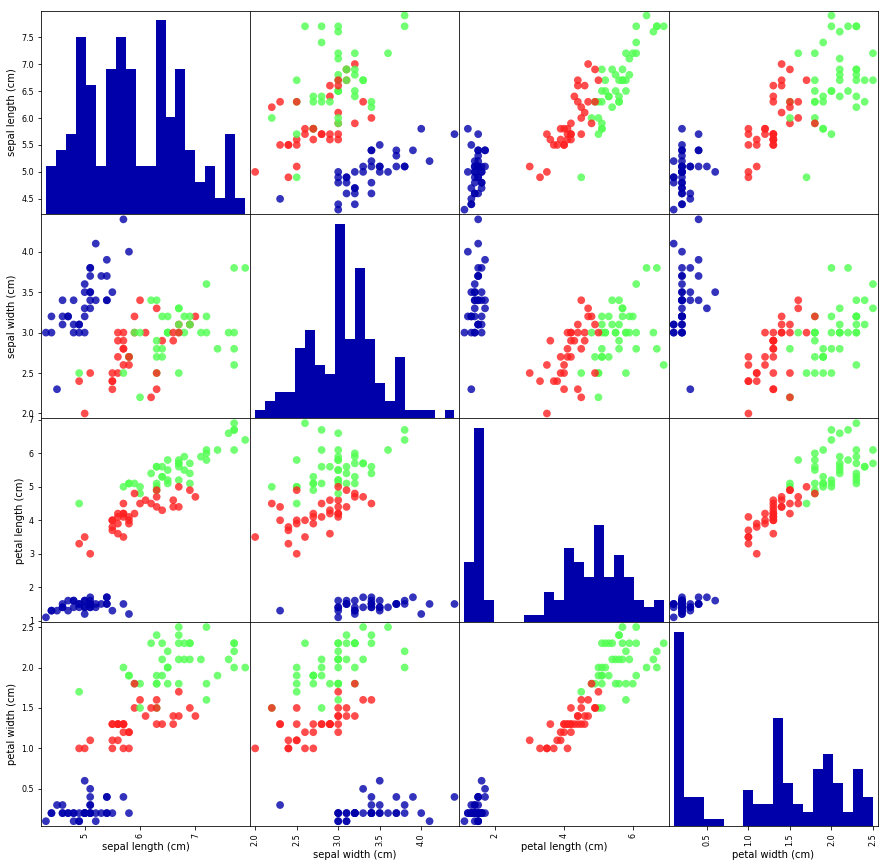

In [30]:
# Create a scatter matrix from the dataframe, color by y_train

pd.plotting.scatter_matrix(
    iris_dataframe,           # The DataFrame containing the data
    c=y_train,                # Color of points based on the target variable (y_train)
    figsize=(15, 15),         # Size of the figure (width, height)
    marker='o',               # Marker style for the points
    hist_kwds={'bins': 20},   # Keyword arguments for the histogram in the diagonal
    s=60,                     # Size of markers
    alpha=.8,                 # Alpha (transparency) value for markers
    cmap=mglearn.cm3          # Colormap for coloring points based on the target variable
);


#### Building Your First Model: k-Nearest Neighbors

In [ ]:
# All machine learning models in scikit-learn are implemented in their own classes,
# which are called Estimator classes. The k-nearest neighbors classification algorithm
# is implemented in the KNeighborsClassifier class in the neighbors module. 

# Before we can use the model, we need to instantiate the class into an object. This is 
# when we will set any parameters of the model. The most important parameter of 
# KNeighborsClassifier is the number of neighbors, which we will set to 1:

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [33]:
# To build the model on the training set, we call the fit method of the knn object,
# which takes as arguments the NumPy array X_train containing the training data and
# the NumPy array y_train of the corresponding training labels:

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

#### Making Predictions

In [35]:
# We can now make predictions using this model on new data for which we might not
# know the correct labels. Imagine we found an iris in the wild with a sepal length of
# 5 cm, a sepal width of 2.9 cm, a petal length of 1 cm, and a petal width of 0.2 cm.

# What species of iris would this be? We can put this data into a NumPy array, again by
# calculating the shapeâ€”that is, the number of samples (1) multiplied by the number of
# features (4):

In [34]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape:", X_new.shape)

X_new.shape: (1, 4)


In [ ]:
# Note that we made the measurements of this single flower into a row in a two-
# dimensional NumPy array, as scikit-learn always expects two-dimensional arrays
# for the data.

In [36]:
prediction = knn.predict(X_new)
print("Prediction:", prediction)
print("Predicted target name:",
       iris_dataset['target_names'][prediction])

Prediction: [0]
Predicted target name: ['setosa']


In [ ]:
# Our model predicts that this new iris belongs to the class 0, meaning its species is setosa. 

#### Evaluating the Model

In [40]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [38]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


In [41]:
# We can also use the score method of the knn object, which will compute the test set
# accuracy for us:

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


### Summary and Outlook

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


### The End